In [2]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model_revised
from models.energy import energy_baseline
from models.energy import energy_LSTM

In [3]:
# Load data
energy = get_energy.get()

  0%|          | 0/263 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 263/263 [00:29<00:00,  8.85it/s]


In [4]:
energy

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-01-07 08:00:00,45.83650,6
2024-01-07 09:00:00,49.69075,6
2024-01-07 10:00:00,52.73325,6


In [5]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
LSTM_model = {
    'name': 'Energy LSTM',
    'function': energy_LSTM.energy_forecast
}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


Epoch 1/10


2024-01-07 13:51:09.729409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:51:09.730038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:51:09.730582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

303/303 - 4s - loss: 0.4230 - val_loss: 0.4171 - 4s/epoch - 13ms/step
Epoch 2/10
303/303 - 2s - loss: 0.4171 - val_loss: 0.4127 - 2s/epoch - 6ms/step
Epoch 3/10
303/303 - 2s - loss: 0.4110 - val_loss: 0.4068 - 2s/epoch - 6ms/step
Epoch 4/10
303/303 - 2s - loss: 0.4050 - val_loss: 0.4081 - 2s/epoch - 6ms/step
Epoch 5/10
303/303 - 2s - loss: 0.4025 - val_loss: 0.4061 - 2s/epoch - 6ms/step
Epoch 6/10
303/303 - 2s - loss: 0.4002 - val_loss: 0.4037 - 2s/epoch - 6ms/step
Epoch 7/10
303/303 - 2s - loss: 0.3982 - val_loss: 0.4017 - 2s/epoch - 6ms/step
Epoch 8/10
303/303 - 2s - loss: 0.3967 - val_loss: 0.4000 - 2s/epoch - 6ms/step
Epoch 9/10
303/303 - 2s - loss: 0.3954 - val_loss: 0.3987 - 2s/epoch - 6ms/step
Epoch 10/10
303/303 - 2s - loss: 0.3943 - val_loss: 0.3978 - 2s/epoch - 6ms/step


2024-01-07 13:51:29.536311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:51:29.537182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:51:29.537762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 381ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:51:30.007659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:51:30.115445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:51:30.116148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:51:30.116836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

303/303 - 4s - loss: 0.4230 - val_loss: 0.4201 - 4s/epoch - 12ms/step
Epoch 2/10
303/303 - 2s - loss: 0.4171 - val_loss: 0.4157 - 2s/epoch - 5ms/step
Epoch 3/10
303/303 - 2s - loss: 0.4105 - val_loss: 0.4111 - 2s/epoch - 5ms/step
Epoch 4/10
303/303 - 2s - loss: 0.4050 - val_loss: 0.4124 - 2s/epoch - 5ms/step
Epoch 5/10
303/303 - 2s - loss: 0.4026 - val_loss: 0.4104 - 2s/epoch - 5ms/step
Epoch 6/10
303/303 - 2s - loss: 0.4004 - val_loss: 0.4079 - 2s/epoch - 5ms/step
Epoch 7/10
303/303 - 2s - loss: 0.3984 - val_loss: 0.4058 - 2s/epoch - 5ms/step
Epoch 8/10
303/303 - 2s - loss: 0.3967 - val_loss: 0.4040 - 2s/epoch - 5ms/step
Epoch 9/10
303/303 - 2s - loss: 0.3953 - val_loss: 0.4024 - 2s/epoch - 5ms/step
Epoch 10/10
303/303 - 2s - loss: 0.3940 - val_loss: 0.4013 - 2s/epoch - 5ms/step


2024-01-07 13:51:47.816779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:51:47.817686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:51:47.818400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 365ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:51:48.292059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:51:48.401272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:51:48.402130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:51:48.402816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.4224 - val_loss: 0.4208 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.4170 - val_loss: 0.4175 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.4113 - val_loss: 0.4119 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.4052 - val_loss: 0.4128 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.4027 - val_loss: 0.4109 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.4003 - val_loss: 0.4086 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.3983 - val_loss: 0.4066 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.3966 - val_loss: 0.4049 - 2s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.3952 - val_loss: 0.4037 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.3940 - val_loss: 0.4029 - 2s/epoch - 5ms/step


2024-01-07 13:52:06.607138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:06.607896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:06.608787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 569ms/step


2024-01-07 13:52:06.903906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:06.904841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:06.905662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-07 13:52:07.287542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:07.288321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:07.289023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.4227 - val_loss: 0.4213 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.4165 - val_loss: 0.4169 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.4097 - val_loss: 0.4114 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.4041 - val_loss: 0.4115 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.4016 - val_loss: 0.4095 - 2s/epoch - 6ms/step
Epoch 6/10
304/304 - 2s - loss: 0.3994 - val_loss: 0.4076 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.3975 - val_loss: 0.4059 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.3959 - val_loss: 0.4045 - 2s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.3945 - val_loss: 0.4035 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.3934 - val_loss: 0.4026 - 2s/epoch - 5ms/step


2024-01-07 13:52:25.646892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:25.647816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:25.648528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 372ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:52:26.126850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:52:26.237834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:26.238592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:26.239330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.4228 - val_loss: 0.4211 - 4s/epoch - 13ms/step
Epoch 2/10
304/304 - 2s - loss: 0.4170 - val_loss: 0.4161 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.4103 - val_loss: 0.4093 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.4046 - val_loss: 0.4100 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.4021 - val_loss: 0.4081 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.3999 - val_loss: 0.4059 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.3980 - val_loss: 0.4043 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.3964 - val_loss: 0.4028 - 2s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.3951 - val_loss: 0.4015 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.3940 - val_loss: 0.4005 - 2s/epoch - 5ms/step


2024-01-07 13:52:44.233433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:44.234251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:44.235112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 369ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:52:44.709464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:52:44.820144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:52:44.821146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:52:44.821774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.4232 - val_loss: 0.4194 - 4s/epoch - 12ms/step
Epoch 2/10
304/304 - 2s - loss: 0.4168 - val_loss: 0.4137 - 2s/epoch - 5ms/step
Epoch 3/10
304/304 - 2s - loss: 0.4096 - val_loss: 0.4080 - 2s/epoch - 5ms/step
Epoch 4/10
304/304 - 2s - loss: 0.4041 - val_loss: 0.4094 - 2s/epoch - 5ms/step
Epoch 5/10
304/304 - 2s - loss: 0.4020 - val_loss: 0.4073 - 2s/epoch - 5ms/step
Epoch 6/10
304/304 - 2s - loss: 0.3999 - val_loss: 0.4047 - 2s/epoch - 5ms/step
Epoch 7/10
304/304 - 2s - loss: 0.3981 - val_loss: 0.4027 - 2s/epoch - 5ms/step
Epoch 8/10
304/304 - 2s - loss: 0.3966 - val_loss: 0.4009 - 2s/epoch - 5ms/step
Epoch 9/10
304/304 - 2s - loss: 0.3954 - val_loss: 0.3996 - 2s/epoch - 5ms/step
Epoch 10/10
304/304 - 2s - loss: 0.3943 - val_loss: 0.3986 - 2s/epoch - 5ms/step


2024-01-07 13:53:02.649047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:02.649908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:02.650631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 369ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:53:03.131459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:53:03.243723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:03.244476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:03.245253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 4s - loss: 0.4224 - val_loss: 0.4198 - 4s/epoch - 13ms/step
Epoch 2/10
305/305 - 2s - loss: 0.4165 - val_loss: 0.4149 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.4097 - val_loss: 0.4085 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.4043 - val_loss: 0.4086 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.4017 - val_loss: 0.4064 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.3994 - val_loss: 0.4040 - 2s/epoch - 5ms/step
Epoch 7/10
305/305 - 2s - loss: 0.3975 - val_loss: 0.4019 - 2s/epoch - 5ms/step
Epoch 8/10
305/305 - 2s - loss: 0.3960 - val_loss: 0.4003 - 2s/epoch - 5ms/step
Epoch 9/10
305/305 - 2s - loss: 0.3948 - val_loss: 0.3994 - 2s/epoch - 5ms/step
Epoch 10/10
305/305 - 2s - loss: 0.3939 - val_loss: 0.3986 - 2s/epoch - 5ms/step


2024-01-07 13:53:21.445161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:21.445883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:21.446692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 365ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:53:21.917892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:53:22.027984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:22.028900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:22.029492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 4s - loss: 0.4227 - val_loss: 0.4213 - 4s/epoch - 12ms/step
Epoch 2/10
305/305 - 2s - loss: 0.4168 - val_loss: 0.4166 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.4103 - val_loss: 0.4104 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.4046 - val_loss: 0.4103 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.4021 - val_loss: 0.4084 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.3999 - val_loss: 0.4064 - 2s/epoch - 5ms/step
Epoch 7/10
305/305 - 2s - loss: 0.3981 - val_loss: 0.4048 - 2s/epoch - 5ms/step
Epoch 8/10
305/305 - 2s - loss: 0.3966 - val_loss: 0.4033 - 2s/epoch - 5ms/step
Epoch 9/10
305/305 - 2s - loss: 0.3954 - val_loss: 0.4022 - 2s/epoch - 5ms/step
Epoch 10/10
305/305 - 2s - loss: 0.3943 - val_loss: 0.4013 - 2s/epoch - 5ms/step


2024-01-07 13:53:40.393932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:40.394869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:40.395462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 368ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:53:41.089896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:53:41.199155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:53:41.200043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:53:41.200801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

305/305 - 4s - loss: 0.4228 - val_loss: 0.4226 - 4s/epoch - 12ms/step
Epoch 2/10
305/305 - 2s - loss: 0.4178 - val_loss: 0.4190 - 2s/epoch - 5ms/step
Epoch 3/10
305/305 - 2s - loss: 0.4126 - val_loss: 0.4124 - 2s/epoch - 5ms/step
Epoch 4/10
305/305 - 2s - loss: 0.4059 - val_loss: 0.4119 - 2s/epoch - 5ms/step
Epoch 5/10
305/305 - 2s - loss: 0.4029 - val_loss: 0.4100 - 2s/epoch - 5ms/step
Epoch 6/10
305/305 - 2s - loss: 0.4005 - val_loss: 0.4079 - 2s/epoch - 6ms/step
Epoch 7/10
305/305 - 2s - loss: 0.3985 - val_loss: 0.4061 - 2s/epoch - 6ms/step
Epoch 8/10
305/305 - 2s - loss: 0.3968 - val_loss: 0.4047 - 2s/epoch - 6ms/step
Epoch 9/10
305/305 - 2s - loss: 0.3956 - val_loss: 0.4037 - 2s/epoch - 6ms/step
Epoch 10/10
305/305 - 2s - loss: 0.3945 - val_loss: 0.4031 - 2s/epoch - 5ms/step


2024-01-07 13:54:00.297810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:00.298603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:00.299490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 369ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:54:00.775192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:54:00.882547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:00.883605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:00.884232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.4230 - val_loss: 0.4225 - 4s/epoch - 12ms/step
Epoch 2/10
306/306 - 2s - loss: 0.4170 - val_loss: 0.4173 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.4099 - val_loss: 0.4111 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.4043 - val_loss: 0.4124 - 2s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.4020 - val_loss: 0.4098 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.3997 - val_loss: 0.4071 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.3978 - val_loss: 0.4048 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 2s - loss: 0.3963 - val_loss: 0.4030 - 2s/epoch - 5ms/step
Epoch 9/10
306/306 - 2s - loss: 0.3952 - val_loss: 0.4019 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.3943 - val_loss: 0.4008 - 2s/epoch - 5ms/step


2024-01-07 13:54:19.029266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:19.030154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:19.030770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:54:19.503392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:54:19.610283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:19.611082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:19.611812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.4226 - val_loss: 0.4212 - 4s/epoch - 12ms/step
Epoch 2/10
306/306 - 2s - loss: 0.4157 - val_loss: 0.4142 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.4079 - val_loss: 0.4092 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.4037 - val_loss: 0.4093 - 2s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.4015 - val_loss: 0.4074 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.3996 - val_loss: 0.4051 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.3980 - val_loss: 0.4031 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 2s - loss: 0.3965 - val_loss: 0.4014 - 2s/epoch - 5ms/step
Epoch 9/10
306/306 - 2s - loss: 0.3953 - val_loss: 0.3999 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.3942 - val_loss: 0.3987 - 2s/epoch - 5ms/step


2024-01-07 13:54:37.941196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:37.942115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:37.942713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:54:38.415570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:54:38.524211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:38.524975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:38.525664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.4232 - val_loss: 0.4227 - 4s/epoch - 13ms/step
Epoch 2/10
306/306 - 2s - loss: 0.4161 - val_loss: 0.4157 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.4082 - val_loss: 0.4103 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.4038 - val_loss: 0.4113 - 2s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.4018 - val_loss: 0.4096 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.3998 - val_loss: 0.4073 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.3979 - val_loss: 0.4054 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 2s - loss: 0.3964 - val_loss: 0.4036 - 2s/epoch - 5ms/step
Epoch 9/10
306/306 - 2s - loss: 0.3950 - val_loss: 0.4023 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.3940 - val_loss: 0.4012 - 2s/epoch - 5ms/step


2024-01-07 13:54:56.588547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:56.589571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:56.590263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:54:57.064758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:54:57.172196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:54:57.173148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:54:57.173760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.4231 - val_loss: 0.4227 - 4s/epoch - 12ms/step
Epoch 2/10
306/306 - 2s - loss: 0.4174 - val_loss: 0.4181 - 2s/epoch - 5ms/step
Epoch 3/10
306/306 - 2s - loss: 0.4113 - val_loss: 0.4109 - 2s/epoch - 5ms/step
Epoch 4/10
306/306 - 2s - loss: 0.4050 - val_loss: 0.4122 - 2s/epoch - 5ms/step
Epoch 5/10
306/306 - 2s - loss: 0.4026 - val_loss: 0.4100 - 2s/epoch - 5ms/step
Epoch 6/10
306/306 - 2s - loss: 0.4002 - val_loss: 0.4076 - 2s/epoch - 5ms/step
Epoch 7/10
306/306 - 2s - loss: 0.3982 - val_loss: 0.4059 - 2s/epoch - 5ms/step
Epoch 8/10
306/306 - 2s - loss: 0.3967 - val_loss: 0.4044 - 2s/epoch - 5ms/step
Epoch 9/10
306/306 - 2s - loss: 0.3954 - val_loss: 0.4033 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.3944 - val_loss: 0.4025 - 2s/epoch - 5ms/step


2024-01-07 13:55:15.660754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:55:15.661749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:55:15.662369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:55:16.367879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:55:16.475169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:55:16.476048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:55:16.476705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

307/307 - 4s - loss: 0.4231 - val_loss: 0.4220 - 4s/epoch - 12ms/step
Epoch 2/10
307/307 - 2s - loss: 0.4176 - val_loss: 0.4179 - 2s/epoch - 6ms/step
Epoch 3/10
307/307 - 2s - loss: 0.4117 - val_loss: 0.4106 - 2s/epoch - 6ms/step
Epoch 4/10
307/307 - 2s - loss: 0.4052 - val_loss: 0.4105 - 2s/epoch - 6ms/step
Epoch 5/10
307/307 - 2s - loss: 0.4024 - val_loss: 0.4085 - 2s/epoch - 6ms/step
Epoch 6/10
307/307 - 2s - loss: 0.4000 - val_loss: 0.4064 - 2s/epoch - 6ms/step
Epoch 7/10
307/307 - 2s - loss: 0.3981 - val_loss: 0.4046 - 2s/epoch - 6ms/step
Epoch 8/10
307/307 - 2s - loss: 0.3965 - val_loss: 0.4031 - 2s/epoch - 6ms/step
Epoch 9/10
307/307 - 2s - loss: 0.3952 - val_loss: 0.4021 - 2s/epoch - 6ms/step
Epoch 10/10
307/307 - 2s - loss: 0.3942 - val_loss: 0.4014 - 2s/epoch - 6ms/step


2024-01-07 13:55:35.954156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:55:35.955161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:55:35.955930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
2024-01-07 13:55:36.434704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

Epoch 1/10


2024-01-07 13:55:36.546095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:55:36.546932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:55:36.547679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

307/307 - 4s - loss: 0.4228 - val_loss: 0.4219 - 4s/epoch - 13ms/step
Epoch 2/10
307/307 - 2s - loss: 0.4168 - val_loss: 0.4163 - 2s/epoch - 5ms/step
Epoch 3/10
307/307 - 2s - loss: 0.4096 - val_loss: 0.4101 - 2s/epoch - 5ms/step
Epoch 4/10
307/307 - 2s - loss: 0.4046 - val_loss: 0.4104 - 2s/epoch - 5ms/step
Epoch 5/10
307/307 - 2s - loss: 0.4023 - val_loss: 0.4078 - 2s/epoch - 5ms/step
Epoch 6/10
307/307 - 2s - loss: 0.4000 - val_loss: 0.4050 - 2s/epoch - 5ms/step
Epoch 7/10
307/307 - 2s - loss: 0.3980 - val_loss: 0.4029 - 2s/epoch - 5ms/step
Epoch 8/10
307/307 - 2s - loss: 0.3964 - val_loss: 0.4010 - 2s/epoch - 5ms/step
Epoch 9/10
307/307 - 2s - loss: 0.3952 - val_loss: 0.3998 - 2s/epoch - 5ms/step
Epoch 10/10
307/307 - 2s - loss: 0.3942 - val_loss: 0.3988 - 2s/epoch - 5ms/step


2024-01-07 13:55:55.125320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-07 13:55:55.126056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-07 13:55:55.126899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

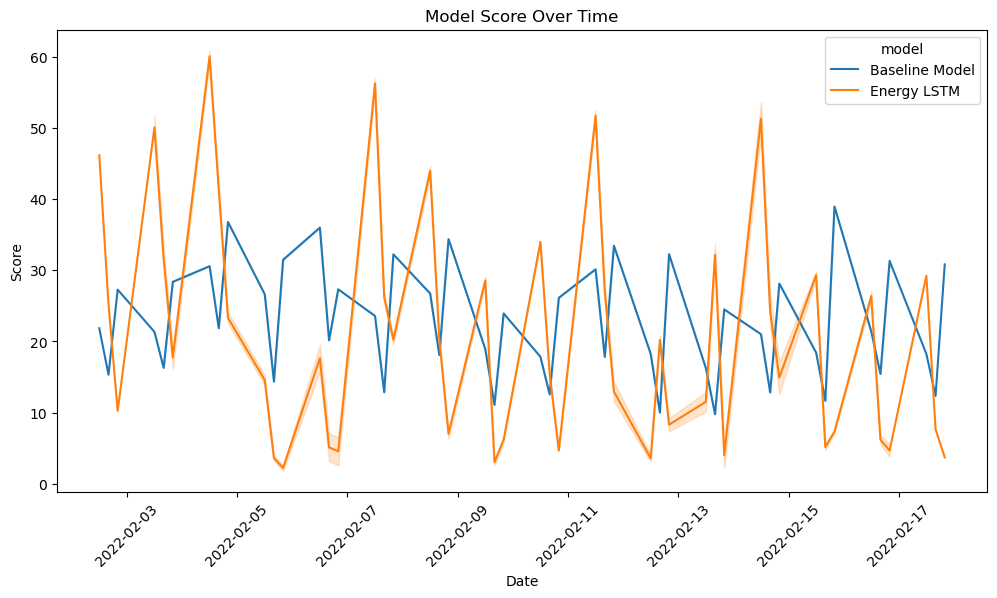

In [6]:
start_date = '2022-02-01'
end_date = '2022-02-15'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model_revised.evaluate(baseline_model, LSTM_model, energy, start_date, end_date, horizon_format="hours")

In [7]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,58.871450,64.338313,67.069375,70.449875,76.481887,2022-02-02 12:00:00+01:00,75.29250,2,21.844678,Baseline Model
1,2022-02-01,energy,40 hour,56.608094,61.109188,63.621000,69.932375,77.224275,2022-02-02 16:00:00+01:00,71.12125,2,15.320403,Baseline Model
2,2022-02-01,energy,44 hour,52.647250,55.703000,58.693500,62.766688,66.638238,2022-02-02 20:00:00+01:00,68.11000,2,27.278043,Baseline Model
3,2022-02-01,energy,60 hour,53.336875,64.185937,66.551875,70.590625,75.597156,2022-02-03 12:00:00+01:00,74.92050,3,21.343733,Baseline Model
4,2022-02-01,energy,64 hour,52.647975,60.605625,63.577375,69.725625,77.007975,2022-02-03 16:00:00+01:00,71.17800,3,16.283375,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,56.608094,61.109188,63.621000,69.998000,77.224275,2022-02-16 16:00:00+01:00,71.19300,2,15.437215,Baseline Model
2,2022-02-15,energy,44 hour,52.647250,55.703000,58.693500,62.786187,66.638238,2022-02-16 20:00:00+01:00,68.92375,2,31.317543,Baseline Model
3,2022-02-15,energy,60 hour,53.336875,64.185937,66.551875,70.886313,75.597156,2022-02-17 12:00:00+01:00,74.03500,3,18.243702,Baseline Model
4,2022-02-15,energy,64 hour,52.647975,60.605625,63.577375,70.671875,77.007975,2022-02-17 16:00:00+01:00,69.66375,3,12.337500,Baseline Model


In [8]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,66.520233,66.180061,66.046677,65.989616,66.080505,2022-02-02 12:00:00+01:00,75.29250,2,46.158371,Energy LSTM
1,2022-02-01,energy,40 hour,66.517998,66.193123,66.047234,65.992744,66.092865,2022-02-02 16:00:00+01:00,71.12125,2,25.266352,Energy LSTM
2,2022-02-01,energy,44 hour,66.502838,66.193893,66.035065,65.982841,66.093575,2022-02-02 20:00:00+01:00,68.11000,2,10.236114,Energy LSTM
3,2022-02-01,energy,60 hour,64.819283,64.614540,64.580040,64.536240,64.601196,2022-02-03 12:00:00+01:00,74.92050,3,51.697534,Energy LSTM
4,2022-02-01,energy,64 hour,64.757889,64.565605,64.520920,64.473373,64.547203,2022-02-03 16:00:00+01:00,71.17800,3,33.271277,Energy LSTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-15,energy,40 hour,69.603317,69.612320,69.591354,69.889557,69.949158,2022-02-16 16:00:00+01:00,71.19300,2,6.852127,Energy LSTM
2,2022-02-15,energy,44 hour,69.636017,69.634781,69.652618,69.925011,69.979988,2022-02-16 20:00:00+01:00,68.92375,2,3.737777,Energy LSTM
3,2022-02-15,energy,60 hour,67.848534,67.916489,68.079422,68.163193,68.336380,2022-02-17 12:00:00+01:00,74.03500,3,29.244177,Energy LSTM
4,2022-02-15,energy,64 hour,67.788300,67.855347,68.048973,68.108139,68.284744,2022-02-17 16:00:00+01:00,69.66375,3,7.635229,Energy LSTM


In [10]:
evaluation_model1['score'].sum()

2047.9918625

In [11]:
evaluation_model2['score'].sum()

1880.0328006744382